# One-Way and Two-Way ANOVA Assignment

## Question 1: One-Way ANOVA using Iris Dataset


(a) Load the dataset and display its structure and summary statistics.  
(b) Identify response variable and factor.  
(c) Draw boxplots.  
(d) State hypotheses.  
(e) Perform ANOVA.  
(f) Report ANOVA table.  
(g) Check normality.  
(h) Check homogeneity.  
(i) Post-hoc test.  
(j) Interpret results.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load Iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


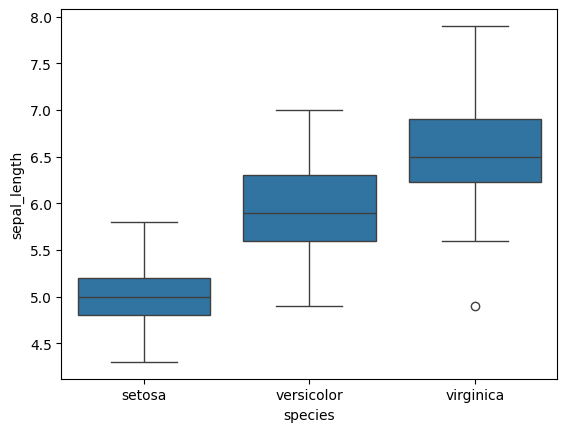

In [6]:
# Boxplot
plt.figure()
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.show()

In [7]:
# One-way ANOVA
model = ols('sepal_length ~ C(species)', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(species),63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


In [8]:
# Normality check (Shapiro-Wilk on residuals)
stats.shapiro(model.resid)

ShapiroResult(statistic=np.float64(0.9878974485131866), pvalue=np.float64(0.21886386315168715))

In [9]:
# Homogeneity check (Levene test)
stats.levene(
    iris[iris['species']=='setosa']['sepal_length'],
    iris[iris['species']=='versicolor']['sepal_length'],
    iris[iris['species']=='virginica']['sepal_length']
)

LeveneResult(statistic=np.float64(6.35272002048269), pvalue=np.float64(0.0022585277836218586))

In [10]:
# Post-hoc test (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=iris['sepal_length'],
                          groups=iris['species'],
                          alpha=0.05)
tukey

## Question 2: Simulation Study


(a) Specify means and variance  
(b) Generate samples  
(c) Perform ANOVA  
(d) Repeat with larger sample  
(e) Comment on power


In [11]:
import numpy as np
# Parameters
mu1, mu2, mu3 = 50, 55, 60
sigma = 5
n = 30
# Generate samples
np.random.seed(1)
g1 = np.random.normal(mu1, sigma, n)
g2 = np.random.normal(mu2, sigma, n)
g3 = np.random.normal(mu3, sigma, n)
# Combine data
data = pd.DataFrame({
    'value': np.concatenate([g1, g2, g3]),
    'group': ['A']*n + ['B']*n + ['C']*n
})

data.head()

,value,group
0,58.121727,A
1,46.941218,A
2,47.359141,A
3,44.635157,A
4,54.327038,A


In [12]:
# ANOVA on simulated data
model2 = ols('value ~ C(group)', data=data).fit()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(group),1854.505089,2.0,43.352812,8.653339e-14
Residual,1860.801353,87.0,NaN,NaN


In [13]:
# Larger sample size
n2 = 100
g1 = np.random.normal(mu1, sigma, n2)
g2 = np.random.normal(mu2, sigma, n2)
g3 = np.random.normal(mu3, sigma, n2)

data2 = pd.DataFrame({
    'value': np.concatenate([g1, g2, g3]),
    'group': ['A']*n2 + ['B']*n2 + ['C']*n2
})
model3 = ols('value ~ C(group)', data=data2).fit()
sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
C(group),4386.886796,2.0,90.142942,2.545143e-31
Residual,7226.885183,297.0,NaN,NaN


## Question 3: Two-Way ANOVA using Tips Dataset


Y = Tip, Factor A = Day, Factor B = Sex  
(a) Load dataset  
(b) Levels  
(c) Descriptive stats  
(d) Boxplots & interaction plots  
(e) Hypotheses  
(f) Fit model  
(g) ANOVA table  
(h) Interaction test  
(i) Additive model  
(j) Compare models  
(k) Diagnostics  
(l) Conclusions


In [14]:
# Load tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
# Descriptive statistics
tips.groupby(['day','sex'])['tip'].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_2880\3594082849.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day','sex'])['tip'].describe()


count      mean       std   min     25%    50%     75%    max
day  sex                                                                  
Thur Male     30.0  2.980333  1.353734  1.44  2.0000  2.530  4.0000   6.70
     Female   32.0  2.575625  1.109286  1.25  1.8225  2.005  3.0575   5.17
Fri  Male     10.0  2.693000  1.136428  1.50  1.6650  2.600  3.3750   4.73
     Female    9.0  2.781111  0.938862  1.00  2.5000  3.000  3.2500   4.30
Sat  Male     59.0  3.083898  1.791360  1.00  2.0000  3.000  3.4000  10.00
     Female   28.0  2.801786  1.234480  1.00  2.1500  2.625  3.1025   6.50
Sun  Male     58.0  3.220345  1.271172  1.32  2.0000  3.085  3.9800   6.50
     Female   18.0  3.367222  1.136775  1.01  2.7075  3.500  3.9375   5.20

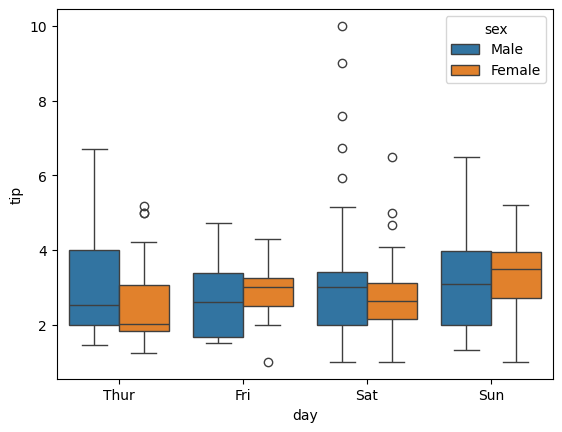

In [16]:
# Boxplot
plt.figure()
sns.boxplot(x='day', y='tip', hue='sex', data=tips)
plt.show()

In [18]:
# Two-way ANOVA with interaction
model_tw = ols('tip ~ C(day)*C(sex)', data=tips).fit()
sm.stats.anova_lm(model_tw, typ=2)

,sum_sq,df,F,PR(>F)
C(day),7.446900,3.0,1.298061,0.275785
C(sex),1.594561,1.0,0.833839,0.362097
C(day):C(sex),2.785891,3.0,0.485606,0.692600
Residual,451.306151,236.0,NaN,NaN


In [19]:
# Additive model (no interaction)
model_add = ols('tip ~ C(day)+C(sex)', data=tips).fit()
sm.stats.anova_lm(model_add, typ=2)

,sum_sq,df,F,PR(>F)
C(day),7.446900,3.0,1.306497,0.272937
C(sex),1.594561,1.0,0.839258,0.360533
Residual,454.092042,239.0,NaN,NaN


In [20]:
# Model comparison (AIC)
model_tw.aic, model_add.aic


(np.float64(858.4965658808418), np.float64(853.9981362889007))

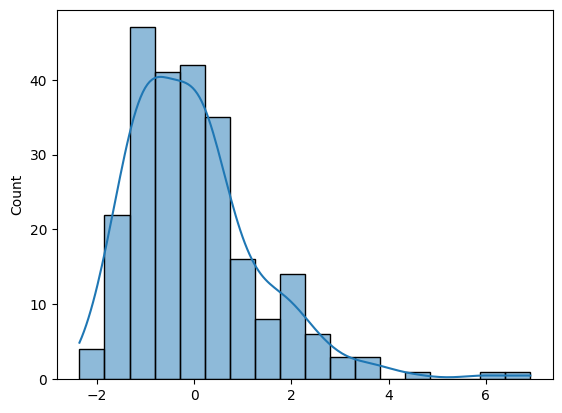

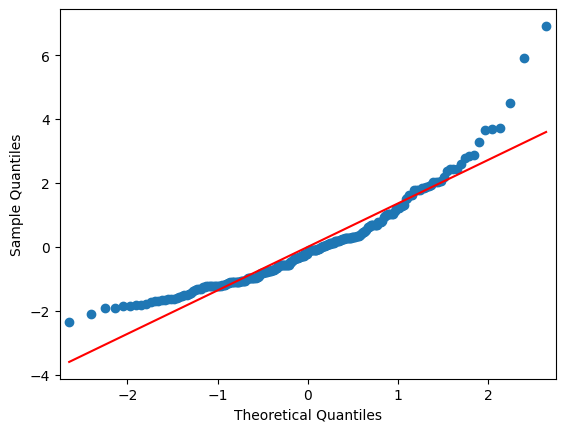

In [21]:
# Residual diagnostics
plt.figure()
sns.histplot(model_tw.resid, kde=True)
plt.show()

sm.qqplot(model_tw.resid, line='s')
plt.show()